### Exploratory Data Analysis on All Flights That Departed NYC in 2013

AIDI 1002 - Lab 1
- Michael Molnar
- 100806823

<b>Problem Statement:</b>  Can we say that Delta Airlines (DL) flights are delayed more than United Airlines (UA) flights?

<b>Dataset:</b> "flights.csv".  The dataset includes 336,776 rows and 19 columns

Each row represents one flight that left from one of New York City's three airports in the year 2013.

The columns are:
    year, month, day, dep_time, sched_dep_time, dep_delay, arr_time, sched_arr_time, arr_delay,
    carrier, flight, tailnum, origin, dest, air_time, distance, hour, minute, time_hour

### Task 1:  Import Flights Dataset and Inspect the Data

In [99]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from math import sqrt
from scipy.stats import ttest_ind

In [100]:
flights_df = pd.read_csv('flights.csv')

In [101]:
type(flights_df)

pandas.core.frame.DataFrame

In [102]:
flights_df.dtypes

year                int64
month               int64
day                 int64
dep_time          float64
sched_dep_time      int64
dep_delay         float64
arr_time          float64
sched_arr_time      int64
arr_delay         float64
carrier            object
flight              int64
tailnum            object
origin             object
dest               object
air_time          float64
distance            int64
hour                int64
minute              int64
time_hour          object
dtype: object

In [103]:
display(flights_df)

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
0,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,1545,N14228,EWR,IAH,227.0,1400,5,15,2013-01-01T05:00:00Z
1,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,1714,N24211,LGA,IAH,227.0,1416,5,29,2013-01-01T05:00:00Z
2,2013,1,1,542.0,540,2.0,923.0,850,33.0,AA,1141,N619AA,JFK,MIA,160.0,1089,5,40,2013-01-01T05:00:00Z
3,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,B6,725,N804JB,JFK,BQN,183.0,1576,5,45,2013-01-01T05:00:00Z
4,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,461,N668DN,LGA,ATL,116.0,762,6,0,2013-01-01T06:00:00Z
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336771,2013,9,30,NaN,1455,NaN,NaN,1634,NaN,9E,3393,NaN,JFK,DCA,NaN,213,14,55,2013-09-30T14:00:00Z
336772,2013,9,30,NaN,2200,NaN,NaN,2312,NaN,9E,3525,NaN,LGA,SYR,NaN,198,22,0,2013-09-30T22:00:00Z
336773,2013,9,30,NaN,1210,NaN,NaN,1330,NaN,MQ,3461,N535MQ,LGA,BNA,NaN,764,12,10,2013-09-30T12:00:00Z
336774,2013,9,30,NaN,1159,NaN,NaN,1344,NaN,MQ,3572,N511MQ,LGA,CLE,NaN,419,11,59,2013-09-30T11:00:00Z


In [104]:
flights_df.shape

(336776, 19)

In [105]:
import sweetviz as sv

In [106]:
events_report = sv.analyze(flights_df)

:FEATURES DONE:                    |█████████████████████| [100%]   00:06  -> (00:00 left)
:PAIRWISE DONE:                    |█████████████████████| [100%]   00:10  -> (00:00 left)


Creating Associations graph... DONE!


In [107]:
events_report.show_html()

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: no browser will pop up, the report is saved in your notebook/colab files.


Observations:
- The dataset is missing 8,255 dep_time values.  
- The dataset is missing 8,255 dep_delay values.  
- The dataset is missing 8,713 arr_time values.  
- The dataset is missing 9,430 arr_delay values.
- The dataset is missing 2,512 tailnum values.
- The dataset is missing 9,430 air_time values.
- All missing values have been replaced with NaN in the dataset.

### Task 2: General Reports

To commence with our examination of the data, we first remove all rows in the dataframe which contain missing values.

In [108]:
# Create a new dataframe, flights2, consisting only of rows containing all values
flights2 = flights_df.dropna()
flights2.shape

(327346, 19)

<b> Report 1:</b>

- First, we look at the number of flights that left New York each month 
- This will give us a sense of if flight traffic varies throughout the year

In [109]:
# Create a dictionary where the keys are the month numbers and the values are the total number of flights in that month
total_flights = flights2['month']
monthly_flights = {}
for i in range(1, 13):
    monthly_flights[i] = total_flights.loc[flights2['month'] == i].count()

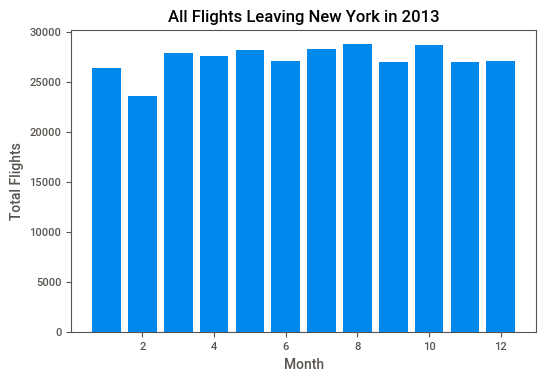

In [110]:
# Plot the results
total_flights_bar = plt.bar(monthly_flights.keys(), monthly_flights.values())
plt.xlabel('Month')
plt.ylabel('Total Flights')
plt.title('All Flights Leaving New York in 2013')
plt.show()

<b> Observations: </b>
- Flight numbers are generally stable month to month, with a slight dip in February

<b> Report 2:</b>

- The ultimate focus of this analysis will be on arrival delay information 
- The following reports will examine how arrival delay varies based on other variables
- First, we look across all flights and examine the number of delays for various lengths of delay
- We include negative values (ie. when a flight arrives earlier than scheduled)

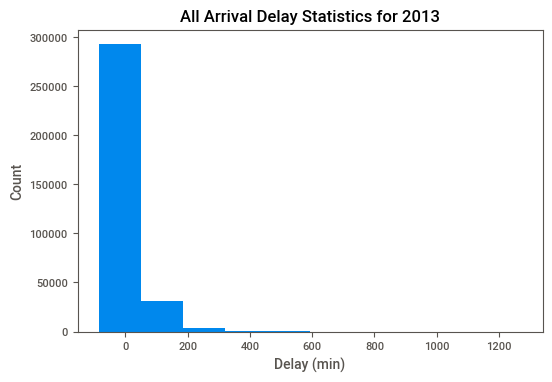

In [111]:
# Plot the delay statistics
delays = flights2['arr_delay']

delays_hist = plt.hist(delays)
plt.xlabel('Delay (min)')
plt.ylabel('Count')
plt.title('All Arrival Delay Statistics for 2013')
plt.show()

In [112]:
# Generate some summary statistics
print('Highest delay: ', flights2['arr_delay'].max(), 'minutes')
long_delays = flights2['arr_delay'].loc[flights2['arr_delay'] > 300].count()
print('Number of delays of 300+ minutes:', long_delays)

Highest delay:  1272.0 minutes
Number of delays of 300+ minutes: 611


<b> Observations: </b>
- The vast majority of flight delays are centred around 0 - slightly early or slightly delayed
- The distribution has positive skew
- The longest delay was 1,272 minutes (over 21 hours!)
- There were 611 flights delayed over 5 hours

<b> Report 3:</b>

- Next, we look at the average flight delay by month, again looking at all of the flights.

In [113]:
# Create a dictionary where the keys are the month numbers
# The values are average flight delay for all flights in that month
month_averages = {}
for i in range(1,13):
    avg = flights2['arr_delay'].loc[flights2['month']==i].mean(axis=0)
    month_averages[i] = avg

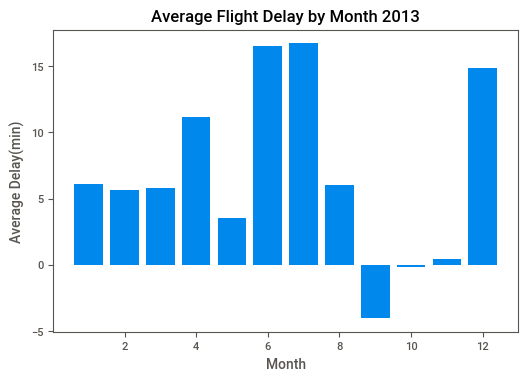

In [114]:
# Plot the results
month_averages_bar = plt.bar(month_averages.keys(), month_averages.values())
plt.xlabel('Month')
plt.ylabel('Average Delay(min)')
plt.title('Average Flight Delay by Month 2013')
plt.show()

<b> Observations: </b>
- We see that average delays are the highest in June, July, and December 
- The first three months of the year experience consistent average delays 
- In September flights arrive early, on average

<b> Report 4:</b>

- Next, we look at the average flight delay for each carrier
- Is delay generally consistent across airlines or do some perform better than others?

In [115]:
# Generate the list of carriers
carrier_list = flights2['carrier'].unique()
carrier_list

array(['UA', 'AA', 'B6', 'DL', 'EV', 'MQ', 'US', 'WN', 'VX', 'FL', 'AS',
       '9E', 'F9', 'HA', 'YV', 'OO'], dtype=object)

In [116]:
# Create a dictionary where the keys are the carriers and the values are the average delays of their flights 
carrier_averages = {}
for i in carrier_list:
    avg = flights2['arr_delay'].loc[flights2['carrier'] == i].mean(axis=0)
    carrier_averages[i] = avg

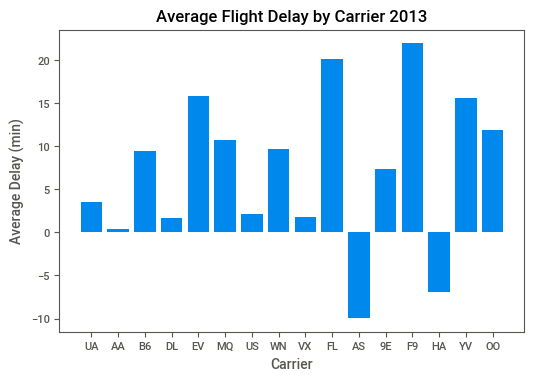

In [117]:
# Plot the results
carrier_averages_bar = plt.bar(carrier_averages.keys(), carrier_averages.values())
plt.xlabel('Carrier')
plt.ylabel('Average Delay (min)')
plt.title('Average Flight Delay by Carrier 2013')
plt.show()

<b> Observations: </b>
- FL, F9, EV, YV have the highest average delays 
- AA, DL, US, VX arrive very close to their scheduled times, on average
- AS and HA arrive early, on average

<b> Report 5:</b>

- We can look at the average delay based on which of New York City's three airports the flight is originating from. 
- Are delays consistent between them?

In [118]:
# Generate the list of airports
origin_list = flights2['origin'].unique()
origin_list

array(['EWR', 'LGA', 'JFK'], dtype=object)

In [119]:
# Create a dictionary where the keys are the airports and the values are the average flight delay for that airport
origin_averages = {}
for i in origin_list:
    avg = flights2['arr_delay'].loc[flights2['origin'] == i].mean(axis=0)
    origin_averages[i] = avg

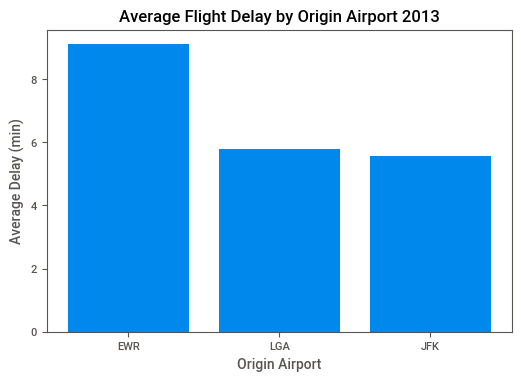

In [120]:
# Plot the results
origin_averages_bar = plt.bar(origin_averages.keys(), origin_averages.values())
plt.xlabel('Origin Airport')
plt.ylabel('Average Delay (min)')
plt.title('Average Flight Delay by Origin Airport 2013')
plt.show()

<b> Observations: </b>
- EWR has a slightly higher average delay than the other two airports at about 9 minutes
- LGA and JFK both average about a 6 minute delay

<b> Report 6:</b>

- How does the average delay relate to the destination?
- Do flights to certain regions experience higher average delays than others?

In [121]:
# Generate the list of flight destinations
dest_list = flights2['dest'].unique()

In [122]:
# Create a dictionary where the keys are the destinations and the values are the average flight delays going there
dest_averages = {}
for i in dest_list:
    avg = flights2['arr_delay'].loc[flights2['dest'] == i].mean(axis=0)
    dest_averages[i] = avg

# Sort the dictionary by the values, for ease of reference
sorted_dest_averages = sorted(dest_averages.items(), key=lambda x: x[1])
print(sorted_dest_averages)

[('LEX', -22.0), ('PSP', -12.722222222222221), ('SNA', -7.8682266009852215), ('STT', -3.835907335907336), ('ANC', -2.5), ('HNL', -1.3651925820256776), ('SEA', -1.0990990990990992), ('MVY', -0.2857142857142857), ('LGB', -0.06202723146747353), ('SLC', 0.1762545899632803), ('LAS', 0.25772849462365593), ('MIA', 0.29905977745191065), ('DFW', 0.32212684787792084), ('LAX', 0.5471109447148383), ('MTJ', 1.7857142857142858), ('PHX', 2.0970473295701257), ('HDN', 2.142857142857143), ('SJU', 2.520526589294994), ('SFO', 2.6728915205344266), ('BOS', 2.9143922247370524), ('OAK', 3.0776699029126213), ('SRQ', 3.0824313072439633), ('SAN', 3.1391657438169065), ('RSW', 3.2381496287835523), ('SJC', 3.448170731707317), ('IAH', 4.240790402258292), ('ABQ', 4.381889763779528), ('MYR', 4.603448275862069), ('ILM', 4.635514018691588), ('ACK', 4.8522727272727275), ('PDX', 5.141579731743666), ('DTW', 5.429963459196102), ('MCO', 5.454643087277153), ('ORD', 5.876614753108777), ('AUS', 6.019908751555371), ('EGE', 6.304

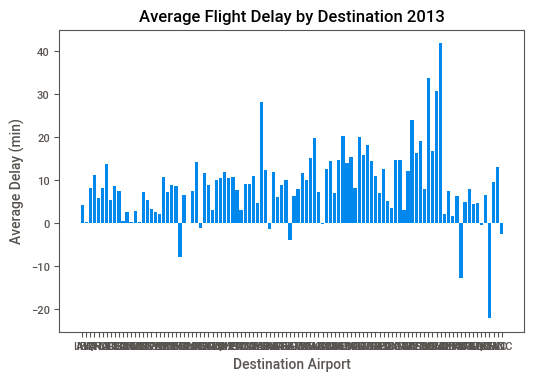

In [123]:
# Plot the results
dest_averages_bar = plt.bar(dest_averages.keys(), dest_averages.values())
plt.xlabel('Destination Airport')
plt.ylabel('Average Delay (min)')
plt.title('Average Flight Delay by Destination 2013')
plt.show()

<b> Observations: </b>
- There are a few extreme values, both positive and negative
- Referring to the printed sorted dictionary, the longest average delays are flights going to CAE (South Carolina), TUL (Oklahoma), OKC (Oklahoma), JAC (Wyoming), and TYS (Tennessee)

- LEX (Kentucky), PSP (California), and SNA (California) arrive earliest, on average

<b> Report 7:</b>

- Next, we look at the average delay against the length of the flight in minutes

In [124]:
# First, find the shortest and longest flight times to generate a range
air_time_low = flights2['air_time'].min()
air_time_high = flights2['air_time'].max()
print(air_time_low)
print(air_time_high)

20.0
695.0


Air time ranges from 20 to 695.  We can divide this range into 20 segments of equal length and group all flights by their corresponding flight times.

In [125]:
step = (695-20)/20

In [126]:
# Create a dictionary where the keys are the starting points of the segments of flight times
# The values are the average flight delay for all fights falling within that segment of time
start = 20
air_time_averages = {}
for i in range (1, 21):
    avg = flights2['arr_delay'].loc[flights2['air_time'].between(start, start+step)].mean(axis=0)
    air_time_averages[start] = avg
    start = start + step 

In [127]:
print(air_time_averages)

{20: 6.781188680068024, 53.75: 8.951518284596885, 87.5: 9.105582343291744, 121.25: 5.955246123038234, 155.0: 10.389510980379049, 188.75: 4.876705738278517, 222.5: 15.279371584699453, 256.25: -2.6558912386706948, 290.0: -4.53057642735699, 323.75: 3.8094719651605877, 357.5: 21.16338880484115, 391.25: 63.37719298245614, 425.0: 39.2, 458.75: 92.0, 492.5: nan, 526.25: nan, 560.0: -8.395348837209303, 593.75: -8.841708542713567, 627.5: 13.151515151515152, 661.25: 35.78947368421053}


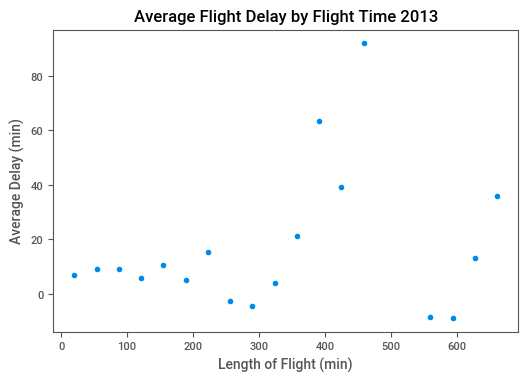

In [128]:
# Plot the results
air_time_averages_scatter = plt.scatter(air_time_averages.keys(), air_time_averages.values())
plt.xlabel('Length of Flight (min)')
plt.ylabel('Average Delay (min)')
plt.title('Average Flight Delay by Flight Time 2013')
plt.show()

<b> Observations: </b>
- Flights that are around 400 minutes in length experience the longest average delays
- Flights that are the longest experience above average delays 
- All other flight lengths have generally consistent average delays

<b> Report 8:</b>

- Lastly, we look at the average delay based on the distance the flight travels in miles

In [129]:
# First, find the shortest and longest flight distances to generate the range
dist_low = flights2['distance'].min()
dist_high = flights2['distance'].max()
print(dist_low)
print(dist_high)

80
4983


Distance ranges from 80 to 4983 miles.  We can divide this range into 50 segments of equal length and group all flights by their corresponding flight distances.

In [130]:
step2 = (4983 - 80)/50

In [131]:
# Create a dictionary where the keys are the starting points of the segments of flight distances
# The values are the average flight delay for all fights falling within that segment
start2 = 80
distance_averages = {}
for i in range (1, 51):
    avg2 = flights2['arr_delay'].loc[flights2['distance'].between(start2, start2+step2)].mean(axis=0)
    distance_averages[start2] = avg2
    start2 = start2 + step2 

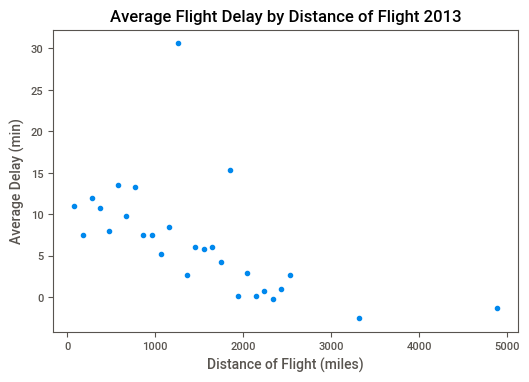

In [132]:
# Plot the results
distance_averages_plt = plt.scatter(distance_averages.keys(), distance_averages.values())
plt.xlabel('Distance of Flight (miles)')
plt.ylabel('Average Delay (min)')
plt.title('Average Flight Delay by Distance of Flight 2013')
plt.show()

<b> Observations: </b>
- Flights that are around 1200 miles in length experience the highest delay, on average
- The average delay decreases as the length of the flight decreases

### We will now specifically compare Delta Airlines and United Airlines data so that we can examine our problem statement 

### Task 3: pop_data

Create a new dataframe containing only the rows where the carrier is 'UA' or 'DL'

In [133]:
pop_data_1 = flights2.loc[flights2['carrier'].isin(['UA', 'DL'])]

In [134]:
display(pop_data_1)

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
0,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,1545,N14228,EWR,IAH,227.0,1400,5,15,2013-01-01T05:00:00Z
1,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,1714,N24211,LGA,IAH,227.0,1416,5,29,2013-01-01T05:00:00Z
4,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,461,N668DN,LGA,ATL,116.0,762,6,0,2013-01-01T06:00:00Z
5,2013,1,1,554.0,558,-4.0,740.0,728,12.0,UA,1696,N39463,EWR,ORD,150.0,719,5,58,2013-01-01T05:00:00Z
12,2013,1,1,558.0,600,-2.0,924.0,917,7.0,UA,194,N29129,JFK,LAX,345.0,2475,6,0,2013-01-01T06:00:00Z
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336728,2013,9,30,2055.0,2059,-4.0,2158.0,2211,-13.0,UA,1066,N16701,EWR,BOS,40.0,200,20,59,2013-09-30T20:00:00Z
336737,2013,9,30,2105.0,2106,-1.0,2329.0,2354,-25.0,UA,475,N477UA,EWR,IAH,175.0,1400,21,6,2013-09-30T21:00:00Z
336744,2013,9,30,2121.0,2100,21.0,2349.0,14,-25.0,DL,2363,N193DN,JFK,LAX,296.0,2475,21,0,2013-09-30T21:00:00Z
336755,2013,9,30,2149.0,2156,-7.0,2245.0,2308,-23.0,UA,523,N813UA,EWR,BOS,37.0,200,21,56,2013-09-30T21:00:00Z


In [135]:
pop_data_1['carrier'].unique()

array(['UA', 'DL'], dtype=object)

<b> Requirements for pop_data dataset:</b>
- pop_data should only contain two columns: company name and delayed arrival flights
- The dataset should be limited to no more than 20,000 rows per airline

First, remove all unnecessary columns

In [136]:
pop_data_2 = pop_data_1.drop(columns=['year', 'month', 'day', 'dep_time', 'sched_dep_time', 'dep_delay',
                                         'arr_time', 'sched_arr_time', 'flight', 'tailnum', 'origin', 'dest', 
                                         'air_time', 'distance', 'hour', 'minute', 'time_hour'])

In [137]:
display(pop_data_2)

,arr_delay,carrier
0,11.0,UA
1,20.0,UA
4,-25.0,DL
5,12.0,UA
12,7.0,UA
...,...,...
336728,-13.0,UA
336737,-25.0,UA
336744,-25.0,DL
336755,-23.0,UA


Next, check how many rows we have for each of United Airlines and Delta Airlines.

In [138]:
pop_data_2.loc[pop_data_2['carrier'] == 'UA'].count()

arr_delay    57782
carrier      57782
dtype: int64

In [139]:
pop_data_2.loc[pop_data_2['carrier'] == 'DL'].count()

arr_delay    47658
carrier      47658
dtype: int64

- United Airlines has 57,782 data points.
- Delta Airlines has 47,658 data points.

<b>Before commencing with taking random samples we will split the dataset and examine the distributions of arrival delays for each of these two airlines.</b>

In [140]:
ua_full = pop_data_2.loc[pop_data_2['carrier'] == 'UA']
dl_full = pop_data_2.loc[pop_data_2['carrier'] == 'DL']

In [141]:
ua_full.shape

(57782, 2)

In [142]:
dl_full.shape

(47658, 2)

<b> We start our examination by plotting the arrival delay data separately for each of the two airlines.</b>

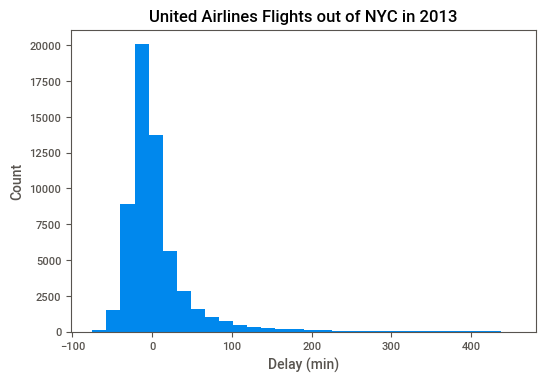

In [143]:
# United Airlines flights
ua_hist = plt.hist(ua_full['arr_delay'], bins=30)
plt.xlabel('Delay (min)')
plt.ylabel('Count')
plt.title('United Airlines Flights out of NYC in 2013')
plt.show()

- The data appears to be somewhat normally distributed but it was definite positive skew.
- The data appears to be centred around 0 but we see values that go beyond 400

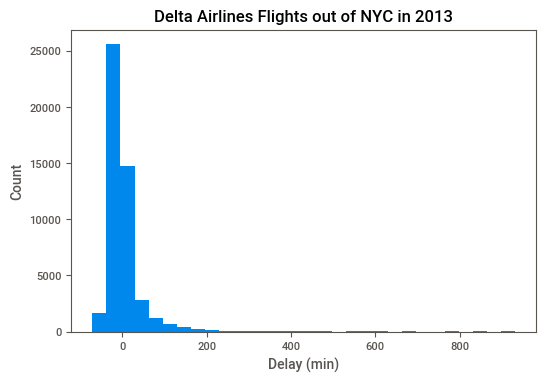

In [144]:
# Delta Airlines flights
dl_hist = plt.hist(dl_full['arr_delay'], bins=30)
plt.xlabel('Delay (min)')
plt.ylabel('Count')
plt.title('Delta Airlines Flights out of NYC in 2013')
plt.show()

- Similarly, the data appears to be somewhat normally distributed but it has definite positive skew.
- The data appears to be centred around 0 but we see values that go beyond 800

<b>Observations:</b>
- Both means appear to be around 0.
- Both appear to have outliers on the high end.

<b>Next steps:</b>
- We will perform a T-Test on this data to examine what we can say about the means of the two samples.

<b> Consideration:</b>
- An assumption required by the T-Test is that the data is approximately normally distributed and approximately symmetric about the mean
- We must decide if we should remove values that we classify as outliers

<b>Question</b> - Is the diffence between the means statistically significant? 

<b>Null Hypothesis:</b>  The average delay of a Delta Airlines flight = The average delay of a United Airlines flight 

<b>Alternate hypothesis:</b>  The means are not equal

In [145]:
# We just Scipy Stat's ttest_ind function to perform this test
t_statistic = ttest_ind(ua_full['arr_delay'], dl_full['arr_delay'])
t_statistic

Ttest_indResult(statistic=7.265976976996793, pvalue=3.728990653731314e-13)

<b>Conclusion:</b>

- Our p-value is 3.728990653731314e-13, which is very close to zero. 
- From this we have evidence to reject the null hypothesis.
- That is, the difference between the means is statistically significant at a 99% confidence level.

<b> Means before removing outliers: </b>

In [146]:
dl_full_mean = dl_full['arr_delay'].mean()
ua_full_mean = ua_full['arr_delay'].mean()
print('Mean of Delta Airlines arrival delay:', dl_full_mean, 'minutes')
print('Mean of United Airlines arrival delay:', ua_full_mean, 'minutes')

Mean of Delta Airlines arrival delay: 1.6443409291199798 minutes
Mean of United Airlines arrival delay: 3.5580111453393792 minutes


We have concluded that the means are statistically different, and we see that United Airlines flights are delayed more on average than Delta Airlines flights.  We also note that both samples have outliers on the high end.  We will now examine these outliers and examine their impact on the means of the two datasets.

<b>Since these distributions appear to be of normal distribution, we define an outlier as a value that is more than 3 standard deviations away from the mean in either direction</b>

In [147]:
# Calculate what constitutes an outlier for United Airlines
ua_full_std = ua_full['arr_delay'].std()
threshold_low_ua = ua_full_mean - 3*ua_full_std
threshold_high_ua = ua_full_mean + 3*ua_full_std

In [148]:
# List outliers on the low end
outliers_low_ua = ua_full[ua_full['arr_delay'] < threshold_low_ua]
outliers_low_ua

,arr_delay,carrier


In [149]:
# List outliers on the high end
outliers_high_ua = ua_full[ua_full['arr_delay'] > threshold_high_ua]
outliers_high_ua

,arr_delay,carrier
268,145.0,UA
1032,171.0,UA
1310,323.0,UA
1337,136.0,UA
1749,359.0,UA
...,...,...
330237,133.0,UA
331920,297.0,UA
332149,140.0,UA
333175,405.0,UA


For United Airlines, we see there are no outliers on the low end but there are 1,247 on the high end.

In [150]:
# Calculate what constitutes an outlier for Delta Airlines
dl_full_std = dl_full['arr_delay'].std()
threshold_low_dl = dl_full_mean - 3*dl_full_std
threshold_high_dl = dl_full_mean + 3*dl_full_std

In [151]:
# List outliers on the low end
outliers_low_dl = dl_full[dl_full['arr_delay'] < threshold_low_dl]
outliers_low_dl

,arr_delay,carrier


In [152]:
# List outliers on the high end
outliers_high_dl = dl_full[dl_full['arr_delay'] > threshold_high_dl]
outliers_high_dl

,arr_delay,carrier
2366,175.0,DL
2598,270.0,DL
3969,308.0,DL
9621,167.0,DL
10708,189.0,DL
...,...,...
323708,168.0,DL
325938,182.0,DL
326949,160.0,DL
328230,328.0,DL


For Delta United Airlines, we see there are no outliers on the low end but there are 920 on the high end.

<b>We will now remove these outliers and examine the effects on our distributions.</b>

In [153]:
# Using the index of the outliers found above, drop these rows for United Airlines
ua_full_no_outliers = ua_full.drop(index = outliers_high_ua.index)

In [154]:
# Do the same for Delta Airlines
dl_full_no_outliers = dl_full.drop(index = outliers_high_dl.index)

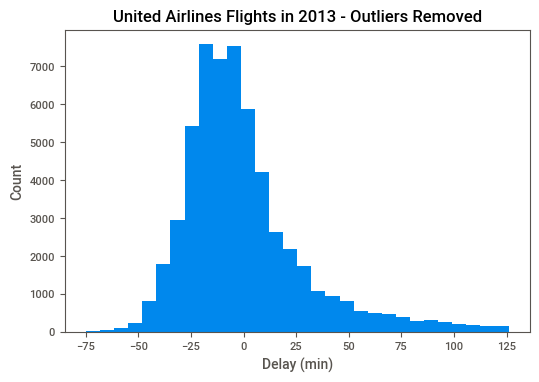

In [155]:
# Replot the distributions
ua_hist_2 = plt.hist(ua_full_no_outliers['arr_delay'], bins=30)
plt.xlabel('Delay (min)')
plt.ylabel('Count')
plt.title('United Airlines Flights in 2013 - Outliers Removed')
plt.show()

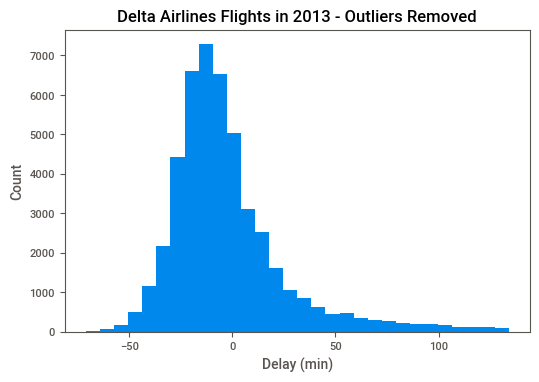

In [156]:
dl_hist_2 = plt.hist(dl_full_no_outliers['arr_delay'], bins=30)
plt.xlabel('Delay (min)')
plt.ylabel('Count')
plt.title('Delta Airlines Flights in 2013 - Outliers Removed')
plt.show()

Before commencing with taking random samples for further analysis, we can compute the new means of these distributions.

In [157]:
dl_full_no_outliers_mean = dl_full_no_outliers['arr_delay'].mean()
ua_full_no_outliers_mean = ua_full_no_outliers['arr_delay'].mean()
print('New mean of Delta Airlines arrival delay:', dl_full_no_outliers_mean, 'minutes')
print('New mean of United Airlines arrival delay:', ua_full_no_outliers_mean, 'minutes')

New mean of Delta Airlines arrival delay: -2.6904446061021012 minutes
New mean of United Airlines arrival delay: -0.6178296630405943 minutes


Let us again perform a T-Test to see if the difference in these means is statistically significant.

Again, our null hypothesis is that the average flight delays are the same for both airlines.

In [158]:
t_statistic = ttest_ind(ua_full_no_outliers['arr_delay'], dl_full_no_outliers['arr_delay'])
t_statistic

Ttest_indResult(statistic=11.649665156410443, pvalue=2.4101420315743854e-31)

- Again, the p-value is essentially equal to zero and again we can reject the null hypothesis.  Thus we can say at a 99% certainty that the average delay of a United Airlines flight is not the same as the average delay of a Delta Airlines flight.  
- We see from the data above that although the average flight delay is a negative value for both airlines, <b>Delta Airlines flights actaully arrive earlier on average than United Airlines flights.</b>

Next, we will take a random sampling of 20,000 rows from each of the Delta Airlines and United Airlines datasets.  We will proceed using the data that has the outliers removed.

In [159]:
# Use the sample method to select a random sample of 20,000 rows
pop_data_ua = ua_full_no_outliers.sample(n=20000, random_state=1)
pop_data_ua.count()

arr_delay    20000
carrier      20000
dtype: int64

In [160]:
pop_data_dl = dl_full_no_outliers.sample(n=20000, random_state=1)
pop_data_dl.count()

arr_delay    20000
carrier      20000
dtype: int64

We can now combine these into our 'pop_data' dataset

In [161]:
pop_data = pd.concat([pop_data_ua, pop_data_dl])

In [162]:
display(pop_data)

,arr_delay,carrier
20597,-27.0,UA
170585,-12.0,UA
201708,-21.0,UA
192584,-17.0,UA
304249,-38.0,UA
...,...,...
314344,-8.0,DL
244522,130.0,DL
192636,-48.0,DL
135519,-4.0,DL


### Task 4: Create datasets "dl" and "ua" - of 1000 observations each

In [163]:
# We now sample 1,000 random rows from each of our previously randomly selected 20,000 rows for each airline
ua = pop_data_ua.sample(n=1000, random_state=1)
dl = pop_data_dl.sample(n=1000, random_state=1)

In [164]:
display(ua)

,arr_delay,carrier
200614,19.0,UA
5276,-10.0,UA
185059,-14.0,UA
286633,-7.0,UA
326932,29.0,UA
...,...,...
52822,-17.0,UA
204979,-29.0,UA
278603,-9.0,UA
60551,28.0,UA


In [165]:
display(dl)

,arr_delay,carrier
328924,8.0,DL
208857,-19.0,DL
321751,-32.0,DL
66494,30.0,DL
166212,-16.0,DL
...,...,...
102333,-27.0,DL
9319,-11.0,DL
320995,10.0,DL
258898,-19.0,DL


### Task 5: Create combined dataset, "samples"

In [166]:
# We join these into a new dataset to be used for future analysis
samples = pd.concat([ua, dl])

In [167]:
display(samples)

,arr_delay,carrier
200614,19.0,UA
5276,-10.0,UA
185059,-14.0,UA
286633,-7.0,UA
326932,29.0,UA
...,...,...
102333,-27.0,DL
9319,-11.0,DL
320995,10.0,DL
258898,-19.0,DL


### Task 6: Calculate the Standard Error and Mean of Each Sample

<b>Standard Error = Sample standard deviation / sqrt(number of samples)</b>

In [168]:
ua_sample_se = (ua['arr_delay'].std()) / sqrt((ua['arr_delay'].count()))
dl_sample_se = (dl['arr_delay'].std()) / sqrt((dl['arr_delay'].count()))

In [169]:
print("Standard Error for United Airlines Sample:", ua_sample_se)

Standard Error for United Airlines Sample: 0.9055168274111337


In [170]:
print("Standard Error for Delta Airlines Sample:", dl_sample_se)

Standard Error for Delta Airlines Sample: 0.9080634422854031


<b> Mean</b>

In [171]:
ua_sample_mean = ua['arr_delay'].mean()
dl_sample_mean = dl['arr_delay'].mean()

In [172]:
print("Mean of United Airlines Sample:", ua_sample_mean)

Mean of United Airlines Sample: -1.106


In [173]:
print("Mean of Delta Airlines Sample:", dl_sample_mean)

Mean of Delta Airlines Sample: -2.442


### Task 7: 95% Confidence Intervals

The confidence intervals are given by the formula, (sample mean) +- t*(sample standard error)

Here, t is the T-statistic with alpha equal to 0.025 and 999 degress of freedom

The T-statistic has a value of 1.96 in this case

In [174]:
# First, for the United Airlines sample
low = ua_sample_mean - 1.96*ua_sample_se
high = ua_sample_mean + 1.96*ua_sample_se

print("The 95% confidence interval for the United Airlines average " 
      "flight delay is: \nfrom {:.3f} to {:.3f} minutes.".format(low, high))

The 95% confidence interval for the United Airlines average flight delay is: 
from -2.881 to 0.669 minutes.


In [175]:
# The for the Delta Airlines sample
low2 = dl_sample_mean - 1.96*dl_sample_se
high2 = dl_sample_mean + 1.96*dl_sample_se

print("The 95% confidence interval for Delta Airlines average " 
      "flight delay is: \nfrom {:.3f} to {:.3f} minutes.".format(low2, high2))

The 95% confidence interval for Delta Airlines average flight delay is: 
from -4.222 to -0.662 minutes.


### Task 8: T-Test

Lastly, we will perform a T-Test to compare the means of these random samples

<b>Question</b> - Is the diffence between the means statistically significant? 

<b>Null Hypothesis:</b>  The average delay of a Delta Airlines flight = The average delay of a United Airlines flight 

<b>Alternate hypothesis:</b>  The means are not equal

In [176]:
t_statistic2 = ttest_ind(dl['arr_delay'], ua['arr_delay'])
t_statistic2

Ttest_indResult(statistic=-1.0417997417576794, pvalue=0.29763057475198257)

<b> Conclusions: </b>

- The p-value is greater than 0.05 and 0.10
- This means we cannot reject the null hypothesis at a 95% or even 90% degree of certainty
- From these random samples we cannot say that there is a statistically significant difference in the average delay for a United Airlines flight versus a Delta Airlines flight